In [259]:
#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore')

#Packages related to data importing, manipulation, exploratory data analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import pandas_profiling
import scipy.stats as stats

#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()

from matplotlib.backends.backend_pdf import PdfPages

#Modules related to split the data & gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV

#Module related to calculation of metrics
from sklearn import metrics

#Module related to VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Modules related to preprocessing (Imputation of missings, standardiszation, new features creation, converting categorical to numerical)
from sklearn.impute import MissingIndicator, SimpleImputer
#from sklearn.preprocessing import Imputer, PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder

#Moudles related to feature selection
from sklearn.feature_selection import RFE, RFECV, SelectKBest, chi2, SelectPercentile, f_classif, mutual_info_classif, f_regression, VarianceThreshold, SelectFromModel, mutual_info_classif, mutual_info_regression, SelectFpr, SelectFdr, SelectFwe


#Modules related to pipe line creation for faster processing
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
#from sklearn.features.transformers import DataFrameSelector

#Modules related to saving python objects permanantly
#from sklearn.externals import joblib

#Dumping model into current directory: joblib.dump(model_xg,"my_model.pkl") 
#Loading model: my_model_loaded=joblib.load("my_model.pkl")

#Modules related key techniques of supervised learning 
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa

from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor#, export_graphviz, export
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from xgboost import XGBClassifier, XGBRegressor
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
#from sklearn.neural_network import MLPClassifier, MLPRegressor

from sklearn.metrics import confusion_matrix



<Figure size 432x216 with 0 Axes>

In [260]:
credit_consumption= pd.read_excel('C:\\Users\\HP\\Desktop\\Desktop\\MACHINE LEARNING\\Machine Learning Capstone Projects\\Capstone Project - ML-Predicting Credit Consumption\\CreditConsumptionData.xlsx')

In [261]:
credit_consumption

,ID,cc_cons
0,12554,20014.0
1,17645,10173.0
2,7604,16095.0
3,1590,7707.0
4,16556,96408.0
...,...,...
19995,12512,NaN
19996,14224,NaN
19997,18740,NaN
19998,18134,NaN


In [262]:
customer_behaviour = pd.read_excel('C:\\Users\\HP\\Desktop\\Desktop\\MACHINE LEARNING\\Machine Learning Capstone Projects\\Capstone Project - ML-Predicting Credit Consumption\\CustomerBehaviorData.xlsx')

In [263]:
customer_behaviour

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17051,3412.600,2909.34,1077.36,3084.50,4615.97,6693.00,19.0,10,2,...,1,108,97916.0,45253.64,47635.00,2,18,19947.0,Y,3448.84
1,11491,18133.760,3877.00,6123.78,5597.43,64620.00,6117.00,4.0,60,1,...,1,4,25125.0,12912.33,18369.00,3,49,20585.0,Y,3812.69
2,7433,6363.650,735.49,8799.00,13768.00,38266.00,2638.00,2.0,83,47,...,70,11,38546.0,93567.51,26713.00,47,49,13950.0,Y,9432.90
3,14606,12765.660,4429.16,16745.86,6360.00,29063.97,3711.00,12.0,2,16,...,43,1,180315.0,176394.48,35062.74,3,37,37018.0,Y,144.61
4,8381,27819.700,1944.00,7006.50,2228.50,1096.25,1065.00,15.0,13,61,...,2,14,13480.0,3167.00,19056.00,2,15,24274.0,Y,1887.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,12512,4641.500,5979.58,6008.61,4410.00,41743.00,1884.00,26.0,1,4,...,35,11,32944.0,105488.53,125470.83,21,50,58037.0,Y,7870.88
19996,14224,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56,50,...,5,8,8850.0,77112.66,86559.00,62,38,24110.0,Y,3668.30
19997,18740,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77,1,...,10,108,35819.0,57192.48,80627.00,2,18,1769.0,Y,5450.34
19998,18134,12824.010,4866.00,12242.48,284.00,15132.77,37911.00,67.0,1,4,...,11,12,39083.0,82039.00,24332.00,117,64,37255.0,Y,59.29


In [264]:
customer_behaviour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     20000 non-null  int64  
 1   cc_cons_apr            20000 non-null  float64
 2   dc_cons_apr            20000 non-null  float64
 3   cc_cons_may            19999 non-null  float64
 4   dc_cons_may            20000 non-null  float64
 5   cc_cons_jun            20000 non-null  float64
 6   dc_cons_jun            19999 non-null  float64
 7   cc_count_apr           19999 non-null  float64
 8   cc_count_may           20000 non-null  int64  
 9   cc_count_jun           20000 non-null  int64  
 10  dc_count_apr           20000 non-null  int64  
 11  dc_count_may           20000 non-null  int64  
 12  dc_count_jun           20000 non-null  int64  
 13  card_lim               20000 non-null  int64  
 14  personal_loan_active   20000 non-null  int64  
 15  ve

In [265]:
customer_behaviour.isna().sum()

ID                       0
cc_cons_apr              0
dc_cons_apr              0
cc_cons_may              1
dc_cons_may              0
cc_cons_jun              0
dc_cons_jun              1
cc_count_apr             1
cc_count_may             0
cc_count_jun             0
dc_count_apr             0
dc_count_may             0
dc_count_jun             0
card_lim                 0
personal_loan_active     0
vehicle_loan_active      0
personal_loan_closed     1
vehicle_loan_closed      0
investment_1             0
investment_2             0
investment_3             2
investment_4             0
debit_amount_apr         0
credit_amount_apr        0
debit_count_apr          1
credit_count_apr         0
max_credit_amount_apr    0
debit_amount_may         0
credit_amount_may        0
credit_count_may         0
debit_count_may          0
max_credit_amount_may    0
debit_amount_jun         0
credit_amount_jun        0
credit_count_jun         0
debit_count_jun          0
max_credit_amount_jun    0
l

In [266]:
def missing_var(x):
    if ((x.dtype=='float') or (x.dtype=='int')):
        x= x.fillna(x.median())
    elif ((x.dtype=='object') or (x.dtype=='O')):
        x = x.fillna(x.mode()[0])
    else:
        x
    return x

In [267]:
customer_behaviour = customer_behaviour.apply(missing_var)

In [268]:
customer_behaviour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     20000 non-null  int64  
 1   cc_cons_apr            20000 non-null  float64
 2   dc_cons_apr            20000 non-null  float64
 3   cc_cons_may            20000 non-null  float64
 4   dc_cons_may            20000 non-null  float64
 5   cc_cons_jun            20000 non-null  float64
 6   dc_cons_jun            20000 non-null  float64
 7   cc_count_apr           20000 non-null  float64
 8   cc_count_may           20000 non-null  int64  
 9   cc_count_jun           20000 non-null  int64  
 10  dc_count_apr           20000 non-null  int64  
 11  dc_count_may           20000 non-null  int64  
 12  dc_count_jun           20000 non-null  int64  
 13  card_lim               20000 non-null  int64  
 14  personal_loan_active   20000 non-null  int64  
 15  ve

In [269]:
def outlier_var(x):
    if ((x.dtype=='float') or (x.dtype=='int')):
        x= x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99))
    else:
        x
    return x

In [270]:
customer_behaviour = customer_behaviour.apply(outlier_var)

In [271]:
customer_behaviour

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17051,3412.600,2909.34,1077.36,3084.50,4615.97,6693.00,19.0,10,2,...,1,108,97916.0,45253.64,47635.00,2,18,19947.0,Y,3448.84
1,11491,18133.760,3877.00,6123.78,5597.43,64620.00,6117.00,4.0,60,1,...,1,4,25125.0,12912.33,18369.00,3,49,20585.0,Y,3812.69
2,7433,6363.650,735.49,8799.00,13768.00,38266.00,2638.00,2.0,83,47,...,70,11,38546.0,93567.51,26713.00,47,49,13950.0,Y,9432.90
3,14606,12765.660,4429.16,16745.86,6360.00,29063.97,3711.00,12.0,2,16,...,43,1,180315.0,176394.48,35062.74,3,37,37018.0,Y,144.61
4,8381,27819.700,1944.00,7006.50,2228.50,1096.25,1065.00,15.0,13,61,...,2,14,13480.0,3167.00,19056.00,2,15,24274.0,Y,1887.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,12512,4641.500,5979.58,6008.61,4410.00,41743.00,1884.00,26.0,1,4,...,35,11,32944.0,105488.53,125470.83,21,50,58037.0,Y,7870.88
19996,14224,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56,50,...,5,8,8850.0,77112.66,86559.00,62,38,24110.0,Y,3668.30
19997,18740,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77,1,...,10,108,35819.0,57192.48,80627.00,2,18,1769.0,Y,5450.34
19998,18134,12824.010,4866.00,12242.48,284.00,15132.77,37911.00,67.0,1,4,...,11,12,39083.0,82039.00,24332.00,117,64,37255.0,Y,59.29


In [272]:
customer_demographics = pd.read_excel('C:\\Users\\HP\\Desktop\\Desktop\\MACHINE LEARNING\\Machine Learning Capstone Projects\\Capstone Project - ML-Predicting Credit Consumption\\CustomerDemographics.xlsx')

In [273]:
customer_demographics

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0
2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0
3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0
4,8908,current,M,32,HIGH,12.0,7,750.0,1,18.0
...,...,...,...,...,...,...,...,...,...,...
19995,1270,current,F,66,MEDIUM,32.2,6,354.0,1,7.0
19996,15992,current,M,53,MEDIUM,19.8,5,809.0,0,14.0
19997,7081,current,F,66,MEDIUM,18.4,1,466.0,0,10.0
19998,6821,current,M,32,LOW,6.0,8,619.0,0,17.0


In [274]:
customer_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            20000 non-null  int64  
 1   account_type                  19999 non-null  object 
 2   gender                        19999 non-null  object 
 3   age                           20000 non-null  int64  
 4   Income                        19999 non-null  object 
 5   Emp_Tenure_Years              20000 non-null  float64
 6   Tenure_with_Bank              20000 non-null  int64  
 7   region_code                   19999 non-null  float64
 8   NetBanking_Flag               20000 non-null  int64  
 9   Avg_days_between_transaction  19997 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 1.5+ MB


In [275]:
customer_demographics.isna().sum()

ID                              0
account_type                    1
gender                          1
age                             0
Income                          1
Emp_Tenure_Years                0
Tenure_with_Bank                0
region_code                     1
NetBanking_Flag                 0
Avg_days_between_transaction    3
dtype: int64

In [276]:
def missing_var(x):
    if ((x.dtype=='float') or (x.dtype=='int')):
        x= x.fillna(x.median())
    elif ((x.dtype=='object') or (x.dtype=='O')):
        x = x.fillna(x.mode()[0])
    else:
        x
    return x

In [277]:
customer_demographics = customer_demographics.apply(missing_var)

In [278]:
customer_demographics.isna().sum()

ID                              0
account_type                    0
gender                          0
age                             0
Income                          0
Emp_Tenure_Years                0
Tenure_with_Bank                0
region_code                     0
NetBanking_Flag                 0
Avg_days_between_transaction    0
dtype: int64

In [279]:
customer_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            20000 non-null  int64  
 1   account_type                  20000 non-null  object 
 2   gender                        20000 non-null  object 
 3   age                           20000 non-null  int64  
 4   Income                        20000 non-null  object 
 5   Emp_Tenure_Years              20000 non-null  float64
 6   Tenure_with_Bank              20000 non-null  int64  
 7   region_code                   20000 non-null  float64
 8   NetBanking_Flag               20000 non-null  int64  
 9   Avg_days_between_transaction  20000 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 1.5+ MB


In [280]:
def outlier_var(x):
    if ((x.dtype=='float') or (x.dtype=='int')):
        x= x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99))
    else:
        x
    return x

In [281]:
customer_demographics = customer_demographics.apply(outlier_var)

In [282]:
customer_demographics

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0
2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0
3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0
4,8908,current,M,32,HIGH,12.0,7,750.0,1,18.0
...,...,...,...,...,...,...,...,...,...,...
19995,1270,current,F,66,MEDIUM,32.2,6,354.0,1,7.0
19996,15992,current,M,53,MEDIUM,19.8,5,809.0,0,14.0
19997,7081,current,F,66,MEDIUM,18.4,1,466.0,0,10.0
19998,6821,current,M,32,LOW,6.0,8,619.0,0,17.0


In [283]:
cust_demo_beha = pd.merge(customer_demographics,customer_behaviour, on = 'ID', how = 'left')

In [284]:
cust_demo_beha

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0,...,5,14,20770.0,44884.90,369000.75,40,96,46088.0,Y,2646.72
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0,...,4,63,78627.0,91073.84,243182.32,7,12,17953.0,Y,5469.79
2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0,...,6,82,1260.0,96552.00,35467.00,16,42,41121.0,Y,7207.85
3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0,...,2,78,23332.0,18250.00,87204.35,2,10,32003.0,Y,591.34
4,8908,current,M,32,HIGH,12.0,7,750.0,1,18.0,...,3,171,41672.0,83525.75,83992.00,21,12,9626.0,Y,2621.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1270,current,F,66,MEDIUM,32.2,6,354.0,1,7.0,...,0,8,24438.0,153772.21,31284.00,3,38,42872.0,Y,6334.20
19996,15992,current,M,53,MEDIUM,19.8,5,809.0,0,14.0,...,47,11,213000.0,18098.47,93108.00,43,11,36747.0,Y,102216.02
19997,7081,current,F,66,MEDIUM,18.4,1,466.0,0,10.0,...,2,171,34327.0,32198.63,46800.00,3,38,18810.0,Y,1930.19
19998,6821,current,M,32,LOW,6.0,8,619.0,0,17.0,...,3,82,51929.0,27334.14,20201.00,47,80,11443.0,Y,24499.91


In [285]:
final_data = pd.merge(cust_demo_beha,credit_consumption, on = 'ID',how = 'right')

In [286]:
final_data

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,12554,current,M,35,MEDIUM,15.0,1,708.0,0,17.0,...,40,24563.0,30051.32,12761.00,2,65,50836.0,Y,1674.09,20014.0
1,17645,current,M,35,HIGH,15.0,6,233.0,0,14.0,...,78,23948.0,42119.05,76206.00,21,63,23226.0,Y,13043.34,10173.0
2,7604,current,M,55,MEDIUM,24.5,1,802.0,1,3.0,...,82,10752.0,58373.25,75283.00,7,1,27036.0,Y,25375.27,16095.0
3,1590,current,F,29,MEDIUM,4.5,6,867.0,1,4.0,...,38,12607.0,69851.51,68708.00,21,83,43037.0,Y,3544.33,7707.0
4,16556,current,M,34,MEDIUM,12.6,4,802.0,1,7.0,...,50,25213.0,10071.00,80140.00,8,32,32044.0,Y,12780.44,96408.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,12512,current,M,35,MEDIUM,13.5,1,523.0,0,7.0,...,11,32944.0,105488.53,125470.83,21,50,58037.0,Y,7870.88,NaN
19996,14224,current,M,53,MEDIUM,9.9,7,723.0,1,2.0,...,8,8850.0,77112.66,86559.00,62,38,24110.0,Y,3668.30,NaN
19997,18740,current,M,62,HIGH,37.8,8,863.0,1,16.0,...,108,35819.0,57192.48,80627.00,2,18,1769.0,Y,5450.34,NaN
19998,18134,current,M,34,MEDIUM,12.6,4,882.0,0,13.0,...,12,39083.0,82039.00,24332.00,117,64,37255.0,Y,59.29,NaN


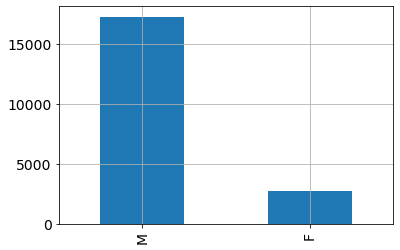

In [287]:
final_data['gender'].value_counts().head(5).plot(kind='bar')
plt.show()

In [288]:
final_data['gender'].value_counts().head(5)

M    17288
F     2712
Name: gender, dtype: int64

In [289]:
final_data_pivot = pd.pivot_table(data = final_data, index = ['gender','account_type'],columns = 'Income',aggfunc = 'sum', values = 'cc_cons')
final_data_pivot

Income                     HIGH          LOW       MEDIUM
gender account_type                                      
F      current        9733613.0   26207526.0   59718515.0
       saving         1558907.0    4378602.0   10599100.0
M      current       48507802.0  166881203.0  389405386.0
       saving         8875216.0   30545761.0   70954317.0

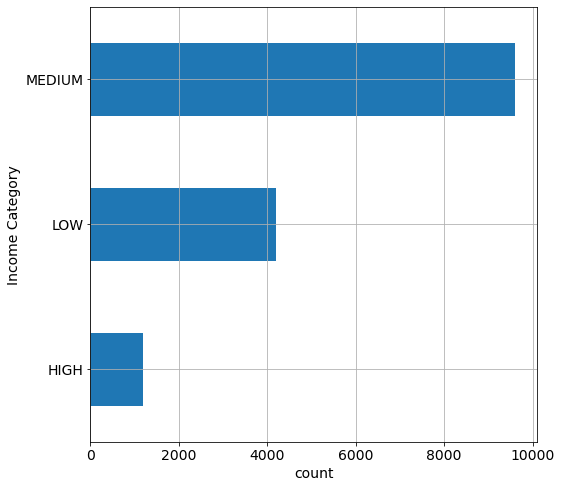

In [290]:
plt.figure(figsize = (8,8))
final_data.groupby('Income')['cc_cons'].count().plot(kind = 'barh')
plt.xlabel('count')
plt.ylabel('Income Category')
plt.show()

In [291]:
final_data['Age Group'] = pd.cut(final_data['age'],bins = np.arange(18,88,8),labels = ['18-26','26-34','34-42','42-50','50-58','58-66','66-74','74-82'],include_lowest = True)
final_data.head()
age_consump =final_data.groupby('Age Group')['cc_cons'].sum().sort_values(ascending = False)
age_consump

Age Group
26-34    284196375.0
34-42    184242070.0
58-66    116705929.0
42-50    103185340.0
50-58     97046870.0
66-74      8080569.0
18-26      4259658.0
74-82            0.0
Name: cc_cons, dtype: float64

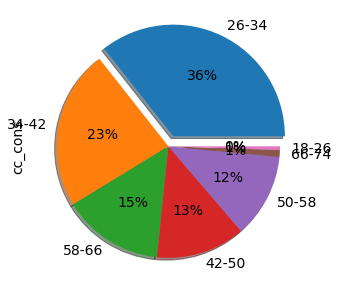

In [292]:
plt.figure(figsize=(5,10))
age_consump.plot(kind = 'pie', autopct = "%1.0f%%",explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0],shadow = True,)

plt.show()

In [293]:
# Top 10 customers in terms of credit consumption
final_data.groupby('ID')[['cc_cons']].sum().sort_values(by = 'cc_cons',ascending = False).head(10)

,cc_cons
ID,
12507,408382.0
18546,408347.0
19676,408282.0
14716,408239.0
16742,408151.0
4345,408025.0
522,407946.0
15356,407693.0
565,407614.0


In [294]:
final_data = pd.get_dummies(final_data, columns = ['account_type', 'gender','Income','loan_enq'])

In [295]:
final_data.shape

(20000, 54)

In [296]:
final_data.head()

,ID,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,...,cc_cons,Age Group,account_type_current,account_type_saving,gender_F,gender_M,Income_HIGH,Income_LOW,Income_MEDIUM,loan_enq_Y
0,12554,35,15.0,1,708.0,0,17.0,24893.00,378.00,10288.00,...,20014.0,34-42,1,0,0,1,0,0,1,1
1,17645,35,15.0,6,233.0,0,14.0,18941.62,966.00,20672.00,...,10173.0,34-42,1,0,0,1,1,0,0,1
2,7604,55,24.5,1,802.0,1,3.0,5678.87,2724.00,1964.50,...,16095.0,50-58,1,0,0,1,0,0,1,1
3,1590,29,4.5,6,867.0,1,4.0,30489.50,1236.00,12609.88,...,7707.0,26-34,1,0,1,0,0,0,1,1
4,16556,34,12.6,4,802.0,1,7.0,7441.40,6906.04,4364.00,...,96408.0,26-34,1,0,0,1,0,0,1,1


In [297]:
final_data['Age Group'] = pd.cut(final_data['age'],bins = np.arange(18,88,8),labels = ['18-26','26-34','34-42','42-50','50-58','58-66','66-74','74-82'],include_lowest = True)
final_data.head()
age_consump =final_data.groupby('Age Group')['cc_cons'].sum().sort_values(ascending = False)
age_consump

Age Group
26-34    284196375.0
34-42    184242070.0
58-66    116705929.0
42-50    103185340.0
50-58     97046870.0
66-74      8080569.0
18-26      4259658.0
74-82            0.0
Name: cc_cons, dtype: float64

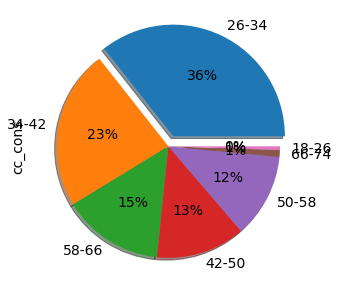

In [298]:
plt.figure(figsize=(5,10))
age_consump.plot(kind = 'pie', autopct = "%1.0f%%",explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0],shadow = True,)

plt.show()

In [299]:
# Top 10 customers in terms of credit consumption
final_data.groupby('ID')[['cc_cons']].sum().sort_values(by = 'cc_cons',ascending = False).head(10)

,cc_cons
ID,
12507,408382.0
18546,408347.0
19676,408282.0
14716,408239.0
16742,408151.0
4345,408025.0
522,407946.0
15356,407693.0
565,407614.0


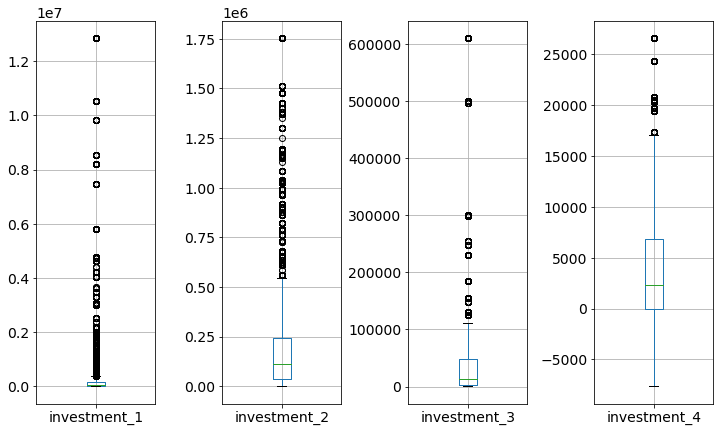

In [300]:
plt.subplot(141)
final_data['investment_1'].plot.box(figsize = (10,6))
plt.tight_layout(pad=0.5)
plt.subplot(142)
final_data['investment_2'].plot.box()
plt.tight_layout(pad=0.5)
plt.subplot(143)
final_data['investment_3'].plot.box()
plt.tight_layout(pad=0.5)
plt.subplot(144)
final_data['investment_4'].plot.box()
plt.tight_layout(pad=0.5)

In [301]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 54 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   ID                            20000 non-null  int64   
 1   age                           20000 non-null  int64   
 2   Emp_Tenure_Years              20000 non-null  float64 
 3   Tenure_with_Bank              20000 non-null  int64   
 4   region_code                   20000 non-null  float64 
 5   NetBanking_Flag               20000 non-null  int64   
 6   Avg_days_between_transaction  20000 non-null  float64 
 7   cc_cons_apr                   20000 non-null  float64 
 8   dc_cons_apr                   20000 non-null  float64 
 9   cc_cons_may                   20000 non-null  float64 
 10  dc_cons_may                   20000 non-null  float64 
 11  cc_cons_jun                   20000 non-null  float64 
 12  dc_cons_jun                   20000 non-null  

In [302]:
data_existing = final_data[final_data.cc_cons.isnull()==0]
data_new = final_data[final_data.cc_cons.isnull()==1]

In [303]:
y = data_existing['cc_cons']

x = data_existing.drop(['cc_cons','Age Group'], axis=1)

In [304]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics

from sklearn.linear_model import LinearRegression

In [305]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 123)

In [306]:
from sklearn.linear_model import LinearRegression

In [307]:
lr = LinearRegression()

In [308]:
lr.fit(x_train, y_train)

LinearRegression()

In [310]:
x_test = data_new.drop(['cc_cons', 'Age Group'],  axis=1)

In [311]:
y_pred = lr.predict(x_test)

In [312]:
data_new.loc[data_new.cc_cons.isnull(),'cc_cons'] = y_pred

In [313]:
data_new

,ID,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,...,cc_cons,Age Group,account_type_current,account_type_saving,gender_F,gender_M,Income_HIGH,Income_LOW,Income_MEDIUM,loan_enq_Y
15000,17591,37,11.9,4,575.0,1,16.0,2795.450,1290.00,6141.05,...,52003.075861,34-42,1,0,0,1,0,0,1,1
15001,13541,33,7.8,6,394.0,0,19.0,29405.130,1640.00,1670.00,...,64928.330362,26-34,1,0,0,1,0,0,1,1
15002,13431,53,33.0,10,324.0,1,15.0,5985.200,6189.00,2696.09,...,62304.185100,50-58,1,0,0,1,0,1,0,1
15003,8687,33,7.8,5,370.0,1,7.0,2105.930,18225.00,34763.56,...,60336.182067,26-34,1,0,0,1,0,0,1,1
15004,14727,62,12.6,9,505.0,1,3.0,3269.000,3532.00,3158.40,...,60566.837080,58-66,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,12512,35,13.5,1,523.0,0,7.0,4641.500,5979.58,6008.61,...,58853.700208,34-42,1,0,0,1,0,0,1,1
19996,14224,53,9.9,7,723.0,1,2.0,4994.450,2805.37,23214.00,...,56747.199111,50-58,1,0,0,1,0,0,1,1
19997,18740,62,37.8,8,863.0,1,16.0,3262.145,2871.00,7335.25,...,51213.927731,58-66,1,0,0,1,1,0,0,1
19998,18134,34,12.6,4,882.0,0,13.0,12824.010,4866.00,12242.48,...,58106.254450,26-34,1,0,0,1,0,0,1,1


In [315]:
#### Select K best
X = data_existing[data_existing.columns.difference(['cc_cons','Age Group'])]
SKB = SelectKBest(f_classif, k=15).fit(X, data_existing[['cc_cons']] )

In [316]:
SKB.get_support()
imp_vars_SKB = list(X.columns[SKB.get_support()])

In [318]:
imp_vars_SKB

['ID',
 'Income_HIGH',
 'card_lim',
 'cc_cons_apr',
 'cc_cons_jun',
 'cc_cons_may',
 'cc_count_apr',
 'credit_count_jun',
 'credit_count_may',
 'dc_cons_apr',
 'dc_cons_jun',
 'debit_amount_apr',
 'investment_2',
 'max_credit_amount_may',
 'region_code']

In [319]:
#Final List (from SelectKbest) 
fxy = list(imp_vars_SKB)
fxy

['ID',
 'Income_HIGH',
 'card_lim',
 'cc_cons_apr',
 'cc_cons_jun',
 'cc_cons_may',
 'cc_count_apr',
 'credit_count_jun',
 'credit_count_may',
 'dc_cons_apr',
 'dc_cons_jun',
 'debit_amount_apr',
 'investment_2',
 'max_credit_amount_may',
 'region_code']

In [320]:
#### VIF
feature=fxy.copy()
a=np.inf
while a>=5:
    vif=[variance_inflation_factor(data_existing[feature].values,i) for i in range(data_existing[feature].shape[1])]
    vif=pd.Series(vif,name='VIF')
    fet=pd.Series(data_existing[feature].columns,name='Feature')
    vifdf=pd.concat([vif,fet],axis=1).sort_values(by="VIF")
    a=vifdf['VIF'].max()
    if a<=5:
        break
    feature=list(vifdf[:-1]["Feature"])
feature

['Income_HIGH',
 'cc_count_apr',
 'dc_cons_jun',
 'investment_2',
 'credit_count_may',
 'dc_cons_apr',
 'credit_count_jun',
 'cc_cons_may',
 'cc_cons_jun',
 'cc_cons_apr',
 'max_credit_amount_may',
 'debit_amount_apr',
 'card_lim',
 'ID']

In [321]:
vif_features = feature
print('No. of features selected',len(vif_features))
vif_features

No. of features selected 14


['Income_HIGH',
 'cc_count_apr',
 'dc_cons_jun',
 'investment_2',
 'credit_count_may',
 'dc_cons_apr',
 'credit_count_jun',
 'cc_cons_may',
 'cc_cons_jun',
 'cc_cons_apr',
 'max_credit_amount_may',
 'debit_amount_apr',
 'card_lim',
 'ID']

In [322]:
ols_model = smf.ols('cc_cons~dc_cons_jun+investment_2+credit_count_may+credit_count_jun+cc_cons_may+max_credit_amount_may+card_lim+card_lim', data=data_new).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                cc_cons   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     266.4
Date:                Fri, 18 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:27:22   Log-Likelihood:                -49831.
No. Observations:                5000   AIC:                         9.968e+04
Df Residuals:                    4992   BIC:                         9.973e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              4.906e+

In [323]:
data_new['y_pred1'] =ols_model.predict(data_new)

In [324]:
RMSPE = np.sqrt(np.mean(((data_new.cc_cons - data_new.y_pred1)/data_new.cc_cons)**2))

In [325]:
RMSPE

0.09554152616067826

In [328]:
output = pd.DataFrame({'Actual': data_new.cc_cons,'Predicted': data_new.y_pred1})
output

,Actual,Predicted
15000,52003.075861,53849.840217
15001,64928.330362,56210.242670
15002,62304.185100,57251.523178
15003,60336.182067,57937.509328
15004,60566.837080,57548.717698
...,...,...
19995,58853.700208,60571.087852
19996,56747.199111,55648.652993
19997,51213.927731,52571.473526
19998,58106.254450,58192.504618


In [329]:
#### Select K best
X = data_new[data_new.columns.difference(['cc_cons', 'Age Group'])]
SKB = SelectKBest(f_classif, k=15).fit(X, data_new[['cc_cons']] )

In [330]:
SKB.get_support()
imp_vars_SKB = list(X.columns[SKB.get_support()])

In [331]:
imp_vars_SKB

['gender_M',
 'investment_1',
 'investment_2',
 'investment_3',
 'investment_4',
 'loan_enq_Y',
 'max_credit_amount_apr',
 'max_credit_amount_jun',
 'max_credit_amount_may',
 'personal_loan_active',
 'personal_loan_closed',
 'region_code',
 'vehicle_loan_active',
 'vehicle_loan_closed',
 'y_pred1']

In [332]:
fxy = list(imp_vars_SKB)
fxy

['gender_M',
 'investment_1',
 'investment_2',
 'investment_3',
 'investment_4',
 'loan_enq_Y',
 'max_credit_amount_apr',
 'max_credit_amount_jun',
 'max_credit_amount_may',
 'personal_loan_active',
 'personal_loan_closed',
 'region_code',
 'vehicle_loan_active',
 'vehicle_loan_closed',
 'y_pred1']

In [333]:
#### VIF
feature=fxy.copy()
a=np.inf
while a>=5:
    vif=[variance_inflation_factor(data_new[feature].values,i) for i in range(data_new[feature].shape[1])]
    vif=pd.Series(vif,name='VIF')
    fet=pd.Series(data_new[feature].columns,name='Feature')
    vifdf=pd.concat([vif,fet],axis=1).sort_values(by="VIF")
    a=vifdf['VIF'].max()
    if a<=5:
        break
    feature=list(vifdf[:-1]["Feature"])
feature

['gender_M',
 'investment_1',
 'investment_2',
 'investment_3',
 'investment_4',
 'loan_enq_Y',
 'max_credit_amount_apr',
 'max_credit_amount_jun',
 'max_credit_amount_may',
 'personal_loan_active',
 'personal_loan_closed',
 'region_code',
 'vehicle_loan_active',
 'vehicle_loan_closed',
 'y_pred1']

In [334]:
vif_features = feature
print('No. of features selected',len(vif_features))
vif_features

No. of features selected 15


['gender_M',
 'investment_1',
 'investment_2',
 'investment_3',
 'investment_4',
 'loan_enq_Y',
 'max_credit_amount_apr',
 'max_credit_amount_jun',
 'max_credit_amount_may',
 'personal_loan_active',
 'personal_loan_closed',
 'region_code',
 'vehicle_loan_active',
 'vehicle_loan_closed',
 'y_pred1']

In [335]:
data_new_train_X, data_new_test_X, data_new_train_y, data_new_test_y = train_test_split(data_new[vif_features],
                                                  data_new['cc_cons'], test_size = 0.2,random_state = 123 )

In [336]:
data_new_train_X_new = data_new_train_X[vif_features]
data_new_train_X_new

,gender_M,investment_1,investment_2,investment_3,investment_4,loan_enq_Y,max_credit_amount_apr,max_credit_amount_jun,max_credit_amount_may,personal_loan_active,personal_loan_closed,region_code,vehicle_loan_active,vehicle_loan_closed,y_pred1
16863,1,63450.00,52000.00,4699.0,13135.0,1,37464.00,16219.00,44339.0,1,1.0,488.0,1,1,55496.366507
15420,1,54860.05,64091.00,78309.0,0.0,1,34622.33,304.00,64208.0,1,1.0,626.0,1,1,58645.457812
18260,1,63590.40,78050.00,50000.0,1332.0,1,40700.00,51347.00,16063.0,1,1.0,594.0,1,1,55671.207094
15742,1,4400.00,150000.00,4000.0,2500.0,1,20146.00,18251.47,28115.0,1,1.0,626.0,1,1,57039.356517
19809,1,1238.65,64491.00,15654.0,8362.0,1,17808.00,28247.00,58036.0,1,1.0,766.0,1,1,57122.207512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,1,46962.50,3342.51,6100.0,0.0,1,4097.12,20834.00,73808.0,1,1.0,508.0,1,1,55966.159015
19060,1,12315.00,251131.79,2019.0,5730.0,1,18543.00,24768.00,23948.0,1,1.0,269.0,1,1,52579.744231
16346,0,19087.60,157000.00,4000.0,1444.0,1,389576.00,160.00,1333.0,1,1.0,801.0,1,1,54019.768167
18454,1,253302.00,760571.30,25508.0,3735.0,1,29455.00,790.00,8750.0,1,1.0,454.0,1,1,53630.151530


In [337]:
data_new_test_X_new = data_new_test_X[vif_features]
data_new_test_X_new

,gender_M,investment_1,investment_2,investment_3,investment_4,loan_enq_Y,max_credit_amount_apr,max_credit_amount_jun,max_credit_amount_may,personal_loan_active,personal_loan_closed,region_code,vehicle_loan_active,vehicle_loan_closed,y_pred1
17648,0,1488748.80,1543.85,5797.0,1500.0,1,25944.0,34739.00,116164.0,1,1.0,858.0,1,1,55060.679183
17456,1,568.80,96096.00,610000.0,1500.0,1,158424.0,75270.00,25377.0,1,1.0,684.0,1,1,53399.873136
19557,0,48675.31,234459.40,12611.0,2921.0,1,27590.0,26460.00,22682.0,1,1.0,446.0,1,1,58379.559120
19884,0,199690.50,152664.00,51520.0,13135.0,1,29730.0,42872.00,24438.0,1,1.0,354.0,1,1,55718.625141
15092,1,22086.05,370000.00,230000.0,2921.0,1,30368.0,88907.00,215000.0,1,1.0,658.0,1,1,62312.347117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19796,1,12.19,760470.30,300000.0,903.0,1,37287.0,83910.00,13487.0,1,1.0,805.0,1,1,54454.591332
19337,1,138272.20,29479.00,67696.0,5773.0,1,17155.0,16879.00,34248.0,1,1.0,583.0,1,1,56627.813281
18100,1,115818.74,121927.80,14904.0,19453.0,1,19450.0,35494.25,33000.0,1,1.0,503.0,1,1,58282.610045
16304,1,265809.85,70000.00,30011.0,1444.0,1,43405.0,31285.00,281169.0,1,1.0,748.0,1,1,56961.713557


In [338]:
data_new_X = data_new[data_new_train_X_new.columns]
data_new_X 

,gender_M,investment_1,investment_2,investment_3,investment_4,loan_enq_Y,max_credit_amount_apr,max_credit_amount_jun,max_credit_amount_may,personal_loan_active,personal_loan_closed,region_code,vehicle_loan_active,vehicle_loan_closed,y_pred1
15000,1,13.80,376600.50,1633.0,-5715.49023,1,24485.0,25945.92,9750.0,1,1.0,575.0,1,1,53849.840217
15001,1,101891.25,470000.00,891.0,26601.00000,1,3375.0,12214.00,16967.0,1,1.0,394.0,1,1,56210.242670
15002,1,53374.97,674291.83,54101.0,2557.00000,1,14950.0,13215.00,36398.0,1,1.0,324.0,1,1,57251.523178
15003,1,9118.35,470000.00,5905.0,5464.00000,1,235844.0,72317.00,97825.0,1,1.0,370.0,1,1,57937.509328
15004,1,12850544.36,101.24,130000.0,1332.00000,1,14495.0,42344.00,27936.0,1,1.0,505.0,1,1,57548.717698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,84446.00,961916.90,505.0,553.00000,1,27825.0,58037.00,32944.0,1,1.0,523.0,1,1,60571.087852
19996,1,1892440.00,295150.90,10271.0,20324.00000,1,27912.0,24110.00,8850.0,1,1.0,723.0,1,1,55648.652993
19997,1,115.45,200015.58,30000.0,6885.00000,1,14580.0,1769.00,35819.0,1,1.0,863.0,1,1,52571.473526
19998,1,48796.45,1631.11,925.0,10455.00000,1,23881.0,37255.00,39083.0,1,1.0,882.0,1,1,58192.504618


In [339]:
data_new_y = data_new['cc_cons']
data_new_y

15000    52003.075861
15001    64928.330362
15002    62304.185100
15003    60336.182067
15004    60566.837080
             ...     
19995    58853.700208
19996    56747.199111
19997    51213.927731
19998    58106.254450
19999    60263.762306
Name: cc_cons, Length: 5000, dtype: float64

### DECISION TREE

In [340]:
import sklearn.tree as dt
import sklearn.ensemble as en

In [341]:
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import GridSearchCV

In [342]:
reg_tree = DecisionTreeRegressor( max_depth = 5 ,random_state=123)
reg_tree.fit( data_new_train_X_new,data_new_train_y )

DecisionTreeRegressor(max_depth=5, random_state=123)

In [343]:
tree_data_new_train_pred = pd.DataFrame( { 'actual':  data_new_train_y ,'predicted': reg_tree.predict( data_new_train_X_new ) } )
tree_data_new_train_pred

,actual,predicted
16863,62810.817098,57670.549963
15420,59967.542469,62084.548221
18260,52257.155901,53876.485006
15742,53824.383064,60053.707317
19809,63347.296635,56424.773075
...,...,...
16593,49429.895634,55786.624678
19060,57797.309234,56812.779283
16346,45879.495839,53876.485006
18454,52312.594936,53896.013914


In [344]:
print(metrics.mean_absolute_percentage_error ( tree_data_new_train_pred.actual,tree_data_new_train_pred.predicted ))

0.06155411501713565


In [345]:
tree_data_new_test_pred = pd.DataFrame( { 'actual': data_new_test_y,'predicted': reg_tree.predict( data_new_test_X_new ) } )
tree_data_new_test_pred

,actual,predicted
17648,50207.491495,51886.555501
17456,45790.927619,50204.676931
19557,52216.557908,62084.548221
19884,57776.259391,57670.549963
15092,60097.115401,62986.544239
...,...,...
19796,47105.935548,51886.555501
19337,57031.226637,60053.707317
18100,62784.403927,62084.548221
16304,54546.588499,56424.773075


In [346]:
print(metrics.mean_absolute_percentage_error ( tree_data_new_test_pred.actual, tree_data_new_test_pred.predicted ))

0.06694007868547584


In [347]:
param_grid = {'max_depth': np.arange(3, 12),'max_features': np.arange(10,29)}

In [348]:
tree = GridSearchCV(DecisionTreeRegressor(random_state=123), param_grid, cv = 5)
tree.fit( data_new_train_X_new,data_new_train_y )

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=123),
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11]),
                         'max_features': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28])})

In [349]:
tree.best_params_

{'max_depth': 5, 'max_features': 13}

In [350]:
reg_tree = DecisionTreeRegressor( max_depth = 5, max_features=13, random_state=123 )
reg_tree.fit( data_new_train_X_new,data_new_train_y )

DecisionTreeRegressor(max_depth=5, max_features=13, random_state=123)

In [351]:
tree_test_pred = pd.DataFrame( { 'actual':  data_new_test_y ,  'predicted': reg_tree.predict( data_new_test_X_new ) } )
tree_test_pred

,actual,predicted
17648,50207.491495,51886.555501
17456,45790.927619,53258.499975
19557,52216.557908,62084.548221
19884,57776.259391,57670.549963
15092,60097.115401,62986.544239
...,...,...
19796,47105.935548,51886.555501
19337,57031.226637,60053.707317
18100,62784.403927,62084.548221
16304,54546.588499,56424.773075


In [352]:
print(metrics.mean_absolute_percentage_error ( tree_test_pred.actual, tree_test_pred.predicted ))

0.0671607259491847


### RANDOM FOREST

In [353]:
radm_reg_new = RandomForestRegressor(oob_score=True,n_estimators=100,random_state=123 )
radm_reg_new.fit( data_new_train_X_new,data_new_train_y )

RandomForestRegressor(oob_score=True, random_state=123)

In [354]:
radm_test_pred = pd.DataFrame( { 'actual':  data_new_test_y,'predicted': radm_reg_new.predict( data_new_test_X_new  ) } )
radm_test_pred

,actual,predicted
17648,50207.491495,51093.820782
17456,45790.927619,51295.815359
19557,52216.557908,62122.882016
19884,57776.259391,60154.199246
15092,60097.115401,60551.410839
...,...,...
19796,47105.935548,49388.487107
19337,57031.226637,58048.660159
18100,62784.403927,61971.727574
16304,54546.588499,57762.557869


In [355]:
metrics.mean_absolute_percentage_error ( radm_test_pred.actual, radm_test_pred.predicted )

0.06273096362313052

In [356]:
pargrid_rf = {'n_estimators': [50,60,70],'max_features': [2,3,4]}

In [357]:
from sklearn.model_selection import GridSearchCV
gscv_rf = GridSearchCV(estimator=RandomForestRegressor(), 
                        param_grid=pargrid_rf, 
                        cv=5,
                        verbose=True, n_jobs=-1)

gscv_results = gscv_rf.fit(data_new_train_X_new, data_new_train_y) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [358]:
gscv_results.best_params_

{'max_features': 4, 'n_estimators': 70}

In [359]:
radm_reg_new1 = RandomForestRegressor(random_state=123,oob_score=True,n_estimators=70, max_features=4, n_jobs=-1)
radm_reg_new1.fit(data_new_train_X_new, data_new_train_y)

RandomForestRegressor(max_features=4, n_estimators=70, n_jobs=-1,
                      oob_score=True, random_state=123)

In [360]:
radm_test_pred1 = pd.DataFrame( { 'actual':  data_new_train_y,'predicted': radm_reg_new1.predict( data_new_train_X_new ) } )
radm_test_pred1

,actual,predicted
16863,62810.817098,61527.221134
15420,59967.542469,60071.091556
18260,52257.155901,53224.096123
15742,53824.383064,54593.256665
19809,63347.296635,60811.352385
...,...,...
16593,49429.895634,52234.437454
19060,57797.309234,57889.980522
16346,45879.495839,48028.157043
18454,52312.594936,54521.971044


In [361]:
print(metrics.mean_absolute_percentage_error ( radm_test_pred1.actual, radm_test_pred1.predicted ))

0.023232941258438985
